In [1]:
import pandas as pd

In [37]:
import xlrd

MCC_last = pd.read_excel('MCC_last.xlsx')

In [179]:
MCC_last[MCC_last['category']=='Parking&Fuel']

,mcc,category
714,5541,Parking&Fuel
715,5542,Parking&Fuel
855,7523,Parking&Fuel


In [81]:
MCC_last[MCC_last.mcc==5411] #6011 - shops

,mcc,category
703,5411,Supermarkets


In [47]:
stores = pd.read_csv('store_last_2.csv', sep=';', encoding='cp1251')

In [180]:
fuel = transactions_with_clients_and_merch[transactions_with_clients_and_merch.mcc==5541]

In [49]:
taxis_all = transactions_with_clients_and_merch[transactions_with_clients_and_merch.mcc==4121]

In [82]:
food_all = transactions_with_clients_and_merch[transactions_with_clients_and_merch.mcc==5411]

In [255]:
food_concurents = food_all[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10]

In [279]:
taxi_concurents = taxis_all[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10]

In [283]:
fuel_concurents = fuel[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10]

In [284]:
fuel_concurents_json = [{'name': conc[0], 'y': float(conc[1])} for conc in fuel_concurents.iterrows()]

In [285]:
fuel_concurents_json

[{'name': 'Лукойл', 'y': 761021521.4597813},
 {'name': 'Газпромнефть', 'y': 628254963.4303288},
 {'name': 'Роснефть', 'y': 325065129.51006794},
 {'name': 'Shell', 'y': 274488858.59997725},
 {'name': 'BP', 'y': 234735448.59997073},
 {'name': 'АЗС', 'y': 109718297.62001362},
 {'name': 'ТНК', 'y': 102940278.9900052},
 {'name': 'Neste', 'y': 95728429.28000085},
 {'name': 'Нефть Магистраль', 'y': 75977466.41998649},
 {'name': 'Татнефть', 'y': 66042696.239996046}]

In [286]:
with open("fuel_concurents.json", "w", encoding='utf-8') as outfile:
     json.dump(fuel_concurents_json, outfile,  indent=4, ensure_ascii=False)

In [268]:
for conc in food_concurents.iterrows():
    print(conc[1])

amount    2.195508e+09
Name: Пятерочка, dtype: float64
amount    2.016591e+09
Name: Лента, dtype: float64
amount    1.378769e+09
Name: Перекресток, dtype: float64
amount    1.377938e+09
Name: Магнит, dtype: float64
amount    8.068558e+08
Name: Азбука Вкуса, dtype: float64
amount    6.934332e+08
Name: Окей, dtype: float64
amount    5.770570e+08
Name: Ашан, dtype: float64
amount    5.715708e+08
Name: Дикси, dtype: float64
amount    5.247773e+08
Name: Metro Cash&Carry, dtype: float64
amount    5.225824e+08
Name: Вкусвилл, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2198e3f70>],
      dtype=object)

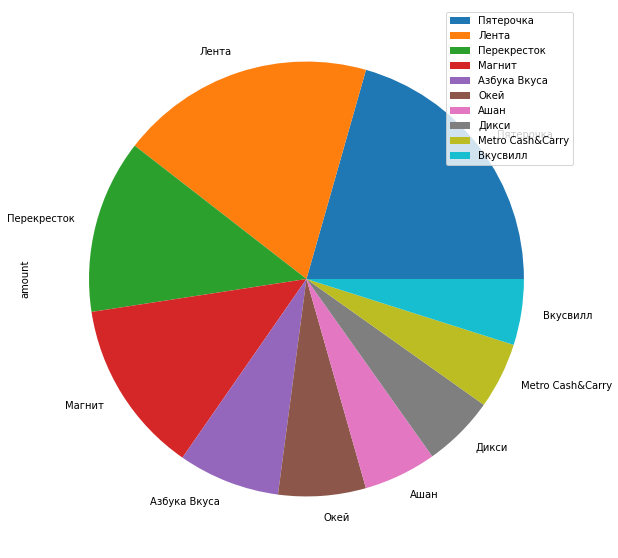

In [254]:
food_all[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10].plot.pie(subplots=True, figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd212770bb0>],
      dtype=object)

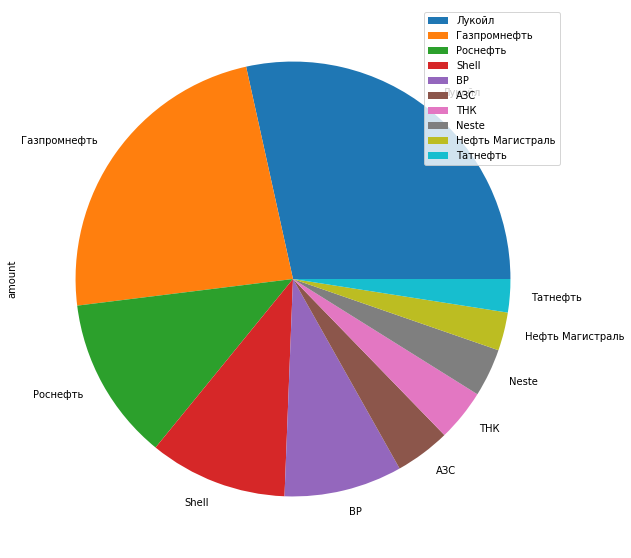

In [181]:
fuel[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10].plot.pie(subplots=True, figsize=(20,10))

In [86]:
food_top = food_all[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10].reset_index()

In [87]:
food_top

,store_name,amount
0,Пятерочка,2.195508e+09
1,Лента,2.016591e+09
2,Перекресток,1.378769e+09
3,Магнит,1.377938e+09
4,Азбука Вкуса,8.068558e+08
5,Окей,6.934332e+08
6,Ашан,5.770570e+08
7,Дикси,5.715708e+08
8,Metro Cash&Carry,5.247773e+08
9,Вкусвилл,5.225824e+08


In [89]:
taxi_top = taxis_all[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10].reset_index()

In [253]:
taxi_top.to_csv('taxi_top.csv')

In [187]:
fuel_top = fuel[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10].reset_index()

In [188]:
fuel_top

,store_name,amount
0,Лукойл,7.610215e+08
1,Газпромнефть,6.282550e+08
2,Роснефть,3.250651e+08
3,Shell,2.744889e+08
4,BP,2.347354e+08
5,АЗС,1.097183e+08
6,ТНК,1.029403e+08
7,Neste,9.572843e+07
8,Нефть Магистраль,7.597747e+07
9,Татнефть,6.604270e+07


In [189]:
food_fuel_dict_ = []
for cl in tqdm(taxi_top.store_name.values):
    res_cl = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']==cl]
    for cl_ in tqdm(fuel_top.store_name.values):
        print(cl, cl_)
        res_cl_ = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']==cl_]
        res_cl_clients = list(set(res_cl.cnum))
        res_cl__clients = list(set(res_cl_.cnum))
        joined_clients = list(set(res_cl_clients) & set(res_cl__clients))
        food_fuel_dict_.append({cl: len(res_cl_clients), cl_:len(res_cl__clients), f'{cl}_{cl_}': len(joined_clients)})

<ipython-input-189-2467583e9a3f>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cl in tqdm(taxi_top.store_name.values):


<ipython-input-189-2467583e9a3f>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cl_ in tqdm(fuel_top.store_name.values):


Яндекс Такси Лукойл
Яндекс Такси Газпромнефть
Яндекс Такси Роснефть
Яндекс Такси Shell
Яндекс Такси BP
Яндекс Такси АЗС
Яндекс Такси ТНК
Яндекс Такси Neste
Яндекс Такси Нефть Магистраль
Яндекс Такси Татнефть



Uber Лукойл
Uber Газпромнефть
Uber Роснефть
Uber Shell
Uber BP
Uber АЗС
Uber ТНК
Uber Neste
Uber Нефть Магистраль
Uber Татнефть



Gett Лукойл
Gett Газпромнефть
Gett Роснефть
Gett Shell
Gett BP
Gett АЗС
Gett ТНК
Gett Neste
Gett Нефть Магистраль
Gett Татнефть



Wheely Лукойл
Wheely Газпромнефть
Wheely Роснефть
Wheely Shell
Wheely BP
Wheely АЗС
Wheely ТНК
Wheely Neste
Wheely Нефть Магистраль
Wheely Татнефть



Яндекс.такси Лукойл
Яндекс.такси Газпромнефть
Яндекс.такси Роснефть
Яндекс.такси Shell
Яндекс.такси BP
Яндекс.такси АЗС
Яндекс.такси ТНК
Яндекс.такси Neste
Яндекс.такси Нефть Магистраль
Яндекс.такси Татнефть



Сити Мобил Лукойл
Сити Мобил Газпромнефть
Сити Мобил Роснефть
Сити Мобил Shell
Сити Мобил BP
Сити Мобил АЗС
Сити Мобил ТНК
Сити Мобил Neste
Сити Мобил Нефть Магистраль
Сити Мобил Татнефть



Делимобиль Лукойл
Делимобиль Газпромнефть
Делимобиль Роснефть
Делимобиль Shell
Делимобиль BP
Делимобиль АЗС
Делимобиль ТНК
Делимобиль Neste
Делимобиль Нефть Магистраль
Делимобиль Татнефть



Ситимобил Лукойл
Ситимобил Газпромнефть
Ситимобил Роснефть
Ситимобил Shell
Ситимобил BP
Ситимобил АЗС
Ситимобил ТНК
Ситимобил Neste
Ситимобил Нефть Магистраль
Ситимобил Татнефть



Belkacar Лукойл
Belkacar Газпромнефть
Belkacar Роснефть
Belkacar Shell
Belkacar BP
Belkacar АЗС
Belkacar ТНК
Belkacar Neste
Belkacar Нефть Магистраль
Belkacar Татнефть



Центральная Касса Лукойл
Центральная Касса Газпромнефть
Центральная Касса Роснефть
Центральная Касса Shell
Центральная Касса BP
Центральная Касса АЗС
Центральная Касса ТНК
Центральная Касса Neste
Центральная Касса Нефть Магистраль
Центральная Касса Татнефть




In [96]:
from tqdm import tqdm_notebook as tqdm
food_taxi_dict_ = []
for cl in tqdm(taxi_top.store_name.values):
    for cl_ in tqdm(food_top.store_name.values):
        print(cl, cl_)
        res_cl = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']==cl]
        res_cl_ = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']==cl_]
        res_cl_clients = list(set(res_cl.cnum))
        res_cl__clients = list(set(res_cl_.cnum))
        joined_clients = list(set(res_cl_clients) & set(res_cl__clients))
        food_taxi_dict_.append({cl: len(res_cl_clients), cl_:len(res_cl__clients), f'{cl}_{cl_}': len(joined_clients)})

<ipython-input-96-f311d01f268e>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cl in tqdm(taxi_top.store_name.values):


<ipython-input-96-f311d01f268e>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cl_ in tqdm(food_top.store_name.values):


Яндекс Такси Пятерочка
Яндекс Такси Лента
Яндекс Такси Перекресток
Яндекс Такси Магнит
Яндекс Такси Азбука Вкуса
Яндекс Такси Окей
Яндекс Такси Ашан
Яндекс Такси Дикси
Яндекс Такси Metro Cash&Carry
Яндекс Такси Вкусвилл



Uber Пятерочка
Uber Лента
Uber Перекресток
Uber Магнит
Uber Азбука Вкуса
Uber Окей
Uber Ашан
Uber Дикси
Uber Metro Cash&Carry
Uber Вкусвилл



Gett Пятерочка
Gett Лента
Gett Перекресток
Gett Магнит
Gett Азбука Вкуса
Gett Окей
Gett Ашан
Gett Дикси
Gett Metro Cash&Carry
Gett Вкусвилл



Wheely Пятерочка
Wheely Лента
Wheely Перекресток
Wheely Магнит
Wheely Азбука Вкуса
Wheely Окей
Wheely Ашан
Wheely Дикси
Wheely Metro Cash&Carry
Wheely Вкусвилл



Яндекс.такси Пятерочка
Яндекс.такси Лента
Яндекс.такси Перекресток
Яндекс.такси Магнит
Яндекс.такси Азбука Вкуса
Яндекс.такси Окей
Яндекс.такси Ашан
Яндекс.такси Дикси
Яндекс.такси Metro Cash&Carry
Яндекс.такси Вкусвилл



Сити Мобил Пятерочка
Сити Мобил Лента
Сити Мобил Перекресток
Сити Мобил Магнит
Сити Мобил Азбука Вкуса
Сити Мобил Окей
Сити Мобил Ашан
Сити Мобил Дикси
Сити Мобил Metro Cash&Carry
Сити Мобил Вкусвилл



Делимобиль Пятерочка
Делимобиль Лента
Делимобиль Перекресток
Делимобиль Магнит
Делимобиль Азбука Вкуса
Делимобиль Окей
Делимобиль Ашан
Делимобиль Дикси
Делимобиль Metro Cash&Carry
Делимобиль Вкусвилл



Ситимобил Пятерочка
Ситимобил Лента
Ситимобил Перекресток
Ситимобил Магнит
Ситимобил Азбука Вкуса
Ситимобил Окей
Ситимобил Ашан
Ситимобил Дикси
Ситимобил Metro Cash&Carry
Ситимобил Вкусвилл



Belkacar Пятерочка
Belkacar Лента
Belkacar Перекресток
Belkacar Магнит
Belkacar Азбука Вкуса
Belkacar Окей
Belkacar Ашан
Belkacar Дикси
Belkacar Metro Cash&Carry
Belkacar Вкусвилл



Центральная Касса Пятерочка
Центральная Касса Лента
Центральная Касса Перекресток
Центральная Касса Магнит
Центральная Касса Азбука Вкуса
Центральная Касса Окей
Центральная Касса Ашан
Центральная Касса Дикси
Центральная Касса Metro Cash&Carry
Центральная Касса Вкусвилл




In [105]:
import json 
with open("taxi_food.json", "w", encoding='utf-8') as outfile:
     json.dump(food_taxi_dict_, outfile,  indent=4, ensure_ascii=False)

In [108]:
import copy
food_taxi_dict_otn = copy.copy(food_taxi_dict_)

In [145]:
food_taxi_dict_otn

[{'Яндекс Такси': 182178,
  'Пятерочка': 574667,
  'Яндекс Такси_Пятерочка': 116395},
 {'Яндекс Такси': 182178, 'Лента': 257441, 'Яндекс Такси_Лента': 47450},
 {'Яндекс Такси': 182178,
  'Перекресток': 308111,
  'Яндекс Такси_Перекресток': 88782},
 {'Яндекс Такси': 182178, 'Магнит': 473642, 'Яндекс Такси_Магнит': 89226},
 {'Яндекс Такси': 182178,
  'Азбука Вкуса': 84271,
  'Яндекс Такси_Азбука Вкуса': 36472},
 {'Яндекс Такси': 182178, 'Окей': 121188, 'Яндекс Такси_Окей': 29699},
 {'Яндекс Такси': 182178, 'Ашан': 132602, 'Яндекс Такси_Ашан': 33381},
 {'Яндекс Такси': 182178, 'Дикси': 220011, 'Яндекс Такси_Дикси': 51170},
 {'Яндекс Такси': 182178,
  'Metro Cash&Carry': 42289,
  'Яндекс Такси_Metro Cash&Carry': 10904},
 {'Яндекс Такси': 182178, 'Вкусвилл': 135935, 'Яндекс Такси_Вкусвилл': 49554},
 {'Uber': 43155, 'Пятерочка': 574667, 'Uber_Пятерочка': 27504},
 {'Uber': 43155, 'Лента': 257441, 'Uber_Лента': 11655},
 {'Uber': 43155, 'Перекресток': 308111, 'Uber_Перекресток': 23191},
 {'Uber

In [195]:
fuel__main

{'Яндекс Такси': {'Татнефть': 6875},
 'Uber': {'Татнефть': 1271},
 'Gett': {'Татнефть': 1069},
 'Wheely': {'Татнефть': 129},
 'Яндекс.такси': {'Татнефть': 552},
 'Сити Мобил': {'Татнефть': 604},
 'Делимобиль': {'Татнефть': 797},
 'Ситимобил': {'Татнефть': 787},
 'Belkacar': {'Татнефть': 654},
 'Центральная Касса': {'Татнефть': 195}}

In [196]:
fuel__main = {}
for i, el in enumerate(food_fuel_dict_):
    k__ = list(el.keys())
    if k__[0] not in fuel__main:
        fuel__main[k__[0]] = {k__[1]: el[k__[2]]}
    else:
        fuel__main[k__[0]].update({k__[1]: el[k__[2]]})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1fd1db370>,
      dtype=object)

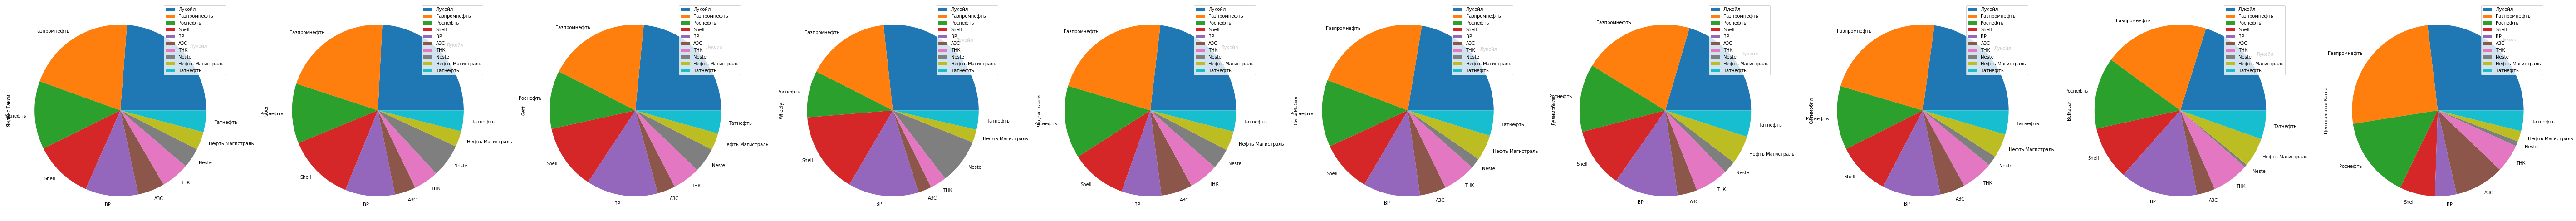

In [197]:
pd.DataFrame(fuel__main).plot.pie(subplots=(2,5), figsize=(100,200))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd21083d850>,
      dtype=object)

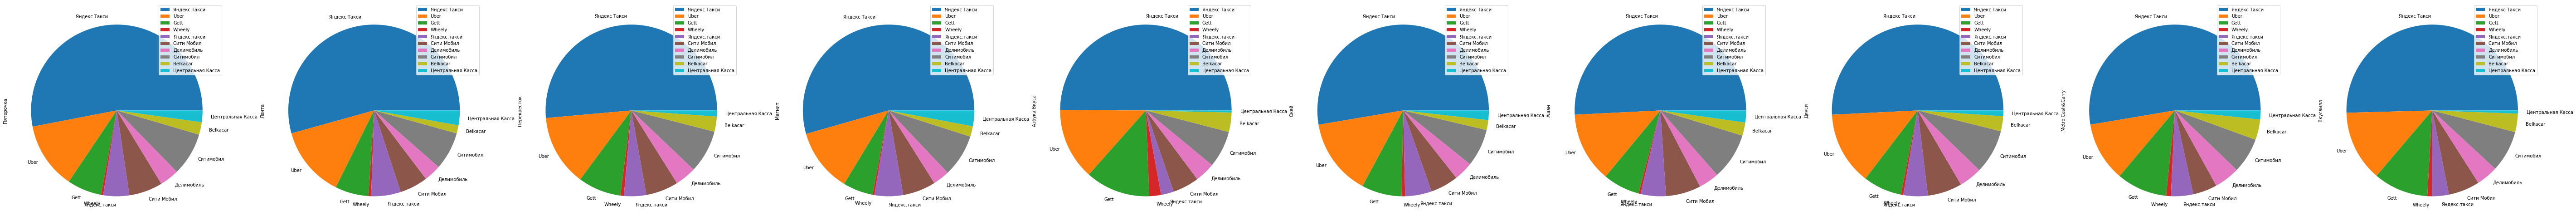

In [164]:
food__main = {}
for i, el in enumerate(food_taxi_dict_otn):
    k__ = list(el.keys())
    if k__[1] not in food__main:
        food__main[k__[1]] = {k__[0]: el[k__[2]]}
    else:
        food__main[k__[1]].update({k__[0]: el[k__[2]]})
pd.DataFrame(food__main).plot.pie(subplots=(2,5), figsize=(100,200))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1fe059940>,
      dtype=object)

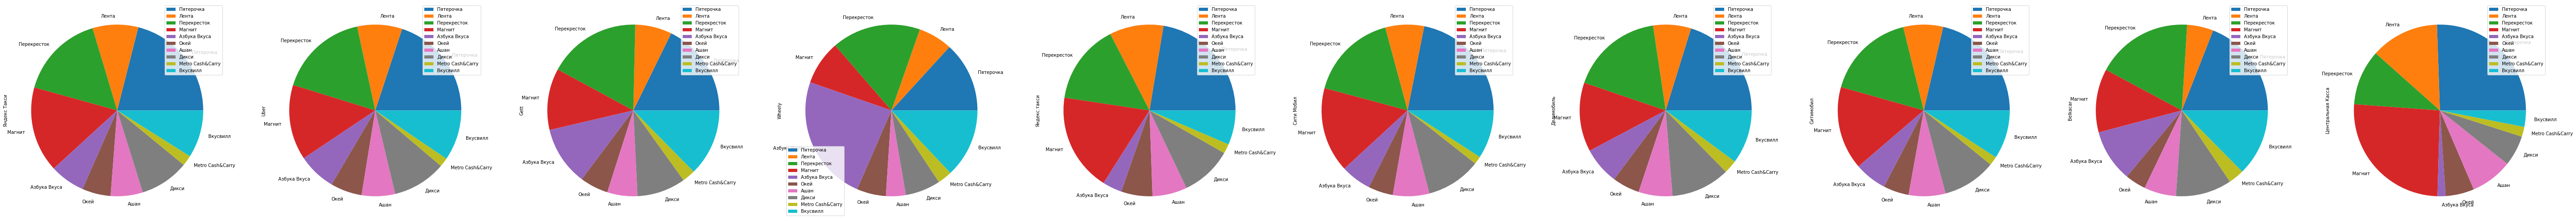

In [221]:
pd.DataFrame(taxis__main).plot.pie(subplots=(2,5), figsize=(100,200))

In [200]:
taxis__main['Wheely'] 

Wheely = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']=='Wheely']
az = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']=='Азбука Вкуса']
vv =  transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']=='Вкусвилл']

In [201]:
joined_clients = list(set(Wheely) & set(az))

# средний чек wheely

In [207]:
Wheely.amount.median()

1056.0

# количество клиентов wheely

In [215]:
len(list(set(Wheely.cnum)))

2802

# количество клиентов Азбуки Вкуса и ВкусВилла пользующихся Wheely

In [213]:
joined_clients_1 = list(set(Wheely.cnum) & set(vv.cnum))
joined_clients = list(set(Wheely.cnum) & set(az.cnum))

In [214]:
len(joined_clients_1+joined_clients)

2497

In [223]:
joined_clients_1.append(joined_clients)

# Тариф  бизнес

In [216]:
mins_ = (Wheely.amount.median()-300)/50

# Тариф First на 10% дешевле

In [235]:
first_ = (mins_*45 +550)*0.9

In [237]:
koef_ = first_/Wheely.amount.median()

# Все транзакции Wheely где клиенты являются пользователями ВкусВилл или Азбуки Вкуса

In [224]:
Wheely[~Wheely['cnum'].isin(joined_clients_1)]

,purchdate,amount,mcc,mrchcity,mrchname,cnum,gender,age,married_,residenttype,category,description,store_name
1970498,2019-10-10 00:00:00,25505.95,4121,MOSKVA,UA11HO,MITRIT,M,44,married,R,70,Regular retail banking customer,Wheely
2208633,2019-11-28 00:00:00,22720.00,4121,MOSKVA,UA11HO,MKMJMT,M,36,not_married,R,70,Regular retail banking customer,Wheely
2223436,2019-09-27 00:00:00,22409.40,4121,MOSKVA,UA11HO,MIMTTK,M,45,not_married,R,80,Affluent Banking regular customer,Wheely
2230355,2019-09-28 00:00:00,22210.85,4121,MOSKVA,UA11HO,EXGHXG,M,33,not_married,R,81,Affluent Banking payroll customer,Wheely
2333743,2019-11-28 00:00:00,20845.00,4121,MOSKVA,UA11HO,ELSD4S,M,38,married,R,81,Affluent Banking payroll customer,Wheely
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100342780,2019-10-14 00:00:00,29.00,4121,MOSKVA,UA11HO,EE2RND,F,35,not_married,R,70,Regular retail banking customer,Wheely
103349940,2019-10-29 00:00:00,16.00,4121,MOSKVA,UA11HO,BFXHGO,M,59,married,R,50,Corporate customer employee/ payroll scheme,Wheely
103584601,2019-09-21 00:00:00,13.00,4121,MOSKVA,UA11HO,TLRPTT,M,47,married,N,81,Affluent Banking payroll customer,Wheely
103634062,2019-10-25 00:00:00,12.00,4121,MOSKVA,UA11HO,LMTTQR,M,35,married,R,80,Affluent Banking regular customer,Wheely


# Средний объем трат клиента на такси Wheely за 3 месяца

In [234]:
Wheely[~Wheely['cnum'].isin(joined_clients_1)].amount.sum()/len(list(set(Wheely[~Wheely['cnum'].isin(joined_clients_1)].cnum)))

22663.324716293595

# скидка на еду - не интересно - повышаем класс со скидкой

покупайте во ВкусВилл и АзбукеВкуса, не думайте ни о чем и ездите Первым классом почти по цене обычного wheely 

допустим воспользуются 30%

In [241]:
(koef_-1)*Wheely[~Wheely['cnum'].isin(joined_clients_1)].amount.sum()*0.3

635233.4189263658

In [146]:
taxis__main = {}
for i, el in enumerate(food_taxi_dict_otn):
    k__ = list(el.keys())
    if i%10==0:
        #d__ = el[k__[0]]
        taxis__main[k__[0]] = {k__[1]: el[k__[2]]}
    else:
        taxis__main[k__[0]].update({k__[1]: el[k__[2]]})
pd.DataFrame(taxis__main).plot.pie(subplots=(2,5), figsize=(100,200))

In [152]:
pd.DataFrame(taxis__main)

{'Пятерочка': 14241,
 'Лента': 5520,
 'Перекресток': 14003,
 'Магнит': 9288,
 'Азбука Вкуса': 8916,
 'Окей': 4271,
 'Ашан': 4550,
 'Дикси': 7332,
 'Metro Cash&Carry': 1970,
 'Вкусвилл': 10131}

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1fe486880>,
      dtype=object)

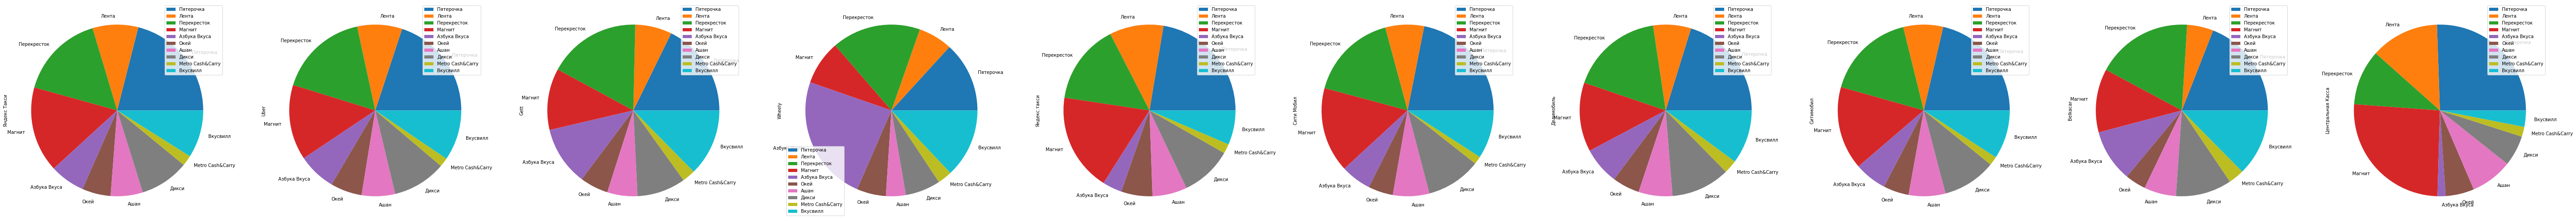

In [153]:
pd.DataFrame(taxis__main).plot.pie(subplots=(2,5), figsize=(100,200))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b6381100>],
      dtype=object)

<Figure size 720x1440 with 0 Axes>

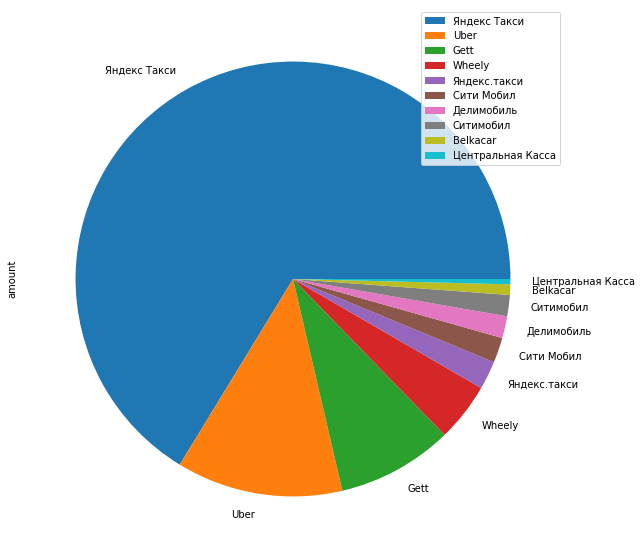

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
taxis_all[['store_name', 'amount']].groupby('store_name').sum().sort_values('amount', ascending=False)[:10].plot.pie(subplots=True, figsize=(20,10))

# уникальные потребители еды

In [244]:
food_eaters = list(set(food_all.cnum))

In [252]:
eaters = {}
for eater in tqdm(food_eaters):
    eaters[eater] = list(set(food_all[food_all.cnum==eater].store_name))

<ipython-input-252-e7e317afa805>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for eater in tqdm(food_eaters):


KeyboardInterrupt: 

In [251]:
len(food_eaters)

1027098

In [2]:
transactions_with_clients_and_merch = pd.read_csv('transactions_with_clients_and_merch.csv')

In [8]:
names_stores = set(transactions_with_clients_and_merch['store_name'])

In [15]:
stores = pd.read_csv('store_last_2.csv', sep=';', encoding='cp1251')

In [28]:
stores[stores['store_name']=='Яндекс Такси']

,store_name,merchant_name
388464,Яндекс Такси,E7N4.O7D81N.JL
495000,Яндекс Такси,O7D81N.E7N4
495001,Яндекс Такси,O7D81N*E7N4
497670,Яндекс Такси,OC *O7D81NE7N4
497671,Яндекс Такси,OC *O7D81NE7N4
503284,Яндекс Такси,ЯНДЕКС ТАКСИ


In [32]:
ya_taxi = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']=='Яндекс Такси']

In [23]:
azbuka = transactions_with_clients_and_merch[transactions_with_clients_and_merch['store_name']=='Азбука Вкуса']

In [29]:
azbuka_clients = list(set(azbuka.cnum))

In [33]:
ya_taxi_clients = list(set(ya_taxi.cnum))

In [35]:
azbuka_ya_taxi_clients = list(set(azbuka_clients) & set(ya_taxi_clients))

In [36]:
len(azbuka_ya_taxi_clients)

36472

In [27]:
azbuka.groupby('cnum').count().sort_values('amount')

,purchdate,amount,mcc,mrchcity,mrchname,gender,age,married_,residenttype,category,description,store_name
cnum,,,,,,,,,,,,
EER7EB,1,1,1,1,1,1,1,1,1,1,1,1
QOGFNH,1,1,1,1,1,1,1,1,1,1,1,1
ELPSL7,1,1,1,1,1,1,1,1,1,1,1,1
EE0PGQ,1,1,1,1,1,1,1,1,1,1,1,1
ELPSMY,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
ELNAC1,165,165,165,165,165,165,165,165,165,165,165,165
NKJKLJ,168,168,168,168,168,168,168,168,168,168,168,168
EEQ0SG,196,196,196,196,196,196,196,196,196,196,196,196


In [7]:
transactions_with_clients_and_merch

,purchdate,amount,mcc,mrchcity,mrchname,cnum,gender,age,married_,residenttype,category,description,store_name
0,2019-11-02 00:00:00,9000000.00,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,F,59,married,R,17,Private Banking customers walk-in,Chanel
1,2019-11-02 00:00:00,9000000.00,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,F,59,married,R,17,Private Banking customers walk-in,Chanel
2,2019-10-25 00:00:00,7716900.00,5691,MOSCOW,HXL4K TL4EEXD,ELETCO,F,51,married,R,80,Affluent Banking regular customer,Louis Vuitton
3,2019-11-29 00:00:00,5100000.00,6513,SANKT-PETERBU,7X 1E7HXD H1DKW1IKCL,EL0KSF,F,46,married,R,70,Regular retail banking customer,NaN
4,2019-12-03 00:00:00,5023956.60,5944,MOSKVA,73 7HJXK7 (W7X),MPKIJJ,M,54,married,R,17,Private Banking customers walk-in,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104161403,2019-10-08 00:00:00,0.01,5411,SAINT-PETERSB,7LIA7D ZLHH4T1J KW0,8ELH0M,M,36,not_married,N,70,Regular retail banking customer,Ашан
104161404,2019-12-03 00:00:00,0.01,4812,CHELYABINSK,XYKI JXKE1H13XC,EEPQ69,M,43,not_married,R,70,Regular retail banking customer,NaN
104161405,2019-11-29 00:00:00,0.01,5812,MOSCOW,J1KEXJ7D J4I1,8EE4HF,F,26,not_married,N,50,Corporate customer employee/ payroll scheme,NaN
104161406,2019-10-31 00:00:00,0.01,5814,MOSCOW,21H1D7O7 EXIA37,EE0H46,F,35,not_married,R,50,Corporate customer employee/ payroll scheme,Зеленая Точка
